In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('data_correlation_gone_norm.csv',index_col = 0)

In [50]:
df = df.loc[df['sqft_lot']<45000.00]

In [52]:
df['price'].mean()+3.5*df['price'].std()

1316471.2385767912

In [53]:
df = df.loc[df['price']<1350000.00]

In [54]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [55]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


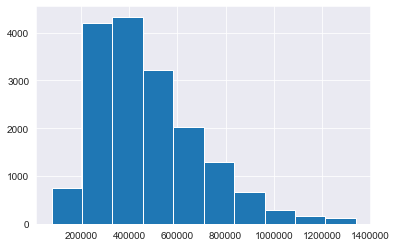

In [56]:
df['price'].hist()

In [57]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


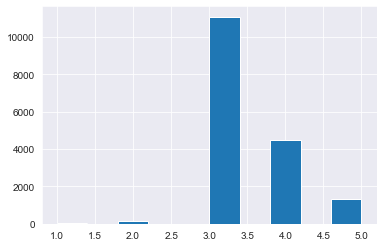

In [58]:
df['condition'].hist()

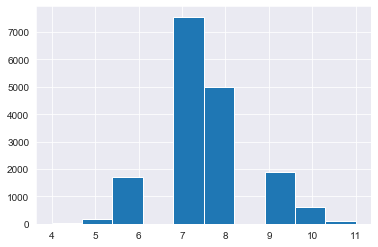

In [59]:
df['grade'].hist()

In [60]:
df['grade'].value_counts()

7     7557
8     4978
9     1873
6     1711
10     625
5      185
11     102
4       25
Name: grade, dtype: int64

In [61]:
df['waterfront'].value_counts()

0.0    17056
Name: waterfront, dtype: int64

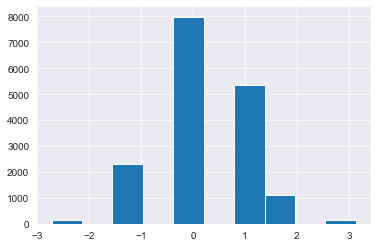

In [62]:
df['bedrooms'].hist()

In [63]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [64]:
# tomodel = ['grade','distance_from_a_city','basement','biggerliving','biggerlot','Years_last_renovation','view']

In [65]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [66]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,-0.378652,0.300253,0.829689,-0.227077,2.0,0.0,0.0,3,7,98125,0.661504,-0.644230,1,1,0,-0.249526,1.041175
1,2015-02-25,180000.0,-1.549166,-1.506346,-1.595932,0.012078,1.0,0.0,0.0,3,6,98028,1.271581,1.344265,0,0,1,-0.054656,1.283006
2,2014-12-09,604000.0,0.791862,1.384213,0.007673,-0.421487,1.0,0.0,0.0,5,7,98136,0.187000,0.247164,1,1,0,-0.470318,-1.091792
3,2015-02-18,510000.0,-0.378652,-0.061067,-0.369646,-0.154411,1.0,0.0,0.0,3,8,98074,-0.558651,-0.507093,0,0,1,-0.352378,0.651681
4,2014-06-27,257500.0,-0.378652,0.300253,-0.322481,-0.263756,2.0,0.0,0.0,3,7,98003,-0.829796,-0.781368,0,0,0,2.022363,-0.661723


In [67]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [68]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [72]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'Age_of_House','basement','grade']
outcome = ['price']

In [73]:
train, test = train_test_split(df)


In [74]:
print(len(train), len(test))
train.head()

12792 4264


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport,bedbath
7089,2014-08-15,405000.0,-0.378652,-0.061067,-0.288792,0.705784,1.0,0.0,0.0,3,7,98028,-0.626437,-0.575662,1,0,1,-0.018825,1.293750,0.023123
6661,2014-07-12,235000.0,-0.378652,-0.422387,-0.720013,-0.168285,1.0,0.0,0.0,4,7,98092,0.288679,0.350017,0,0,0,2.256242,-0.255500,0.159938
3396,2014-06-17,386000.0,-1.549166,0.661573,-0.450500,-0.577918,2.0,0.0,0.0,3,8,98065,-1.270407,-1.227065,0,0,1,1.268550,1.253796,-1.024886
15699,2015-02-11,327555.0,-0.378652,0.661573,0.504925,-0.359054,2.0,0.0,0.0,3,8,98030,-1.338194,-1.295634,0,1,0,1.408029,-0.998645,-0.250506
5429,2014-05-05,406100.0,-0.378652,0.300253,-0.733489,-0.739551,3.0,0.0,0.0,3,8,98103,-1.168728,-1.124212,0,0,0,-0.616511,0.703585,-0.113691


In [75]:
X = train[x_cols]
y = train['price']

In [76]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          3.064e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:40   Log-Likelihood:                     -1.6751e+05
No. Observations:               12792   AIC:                                  3.350e+05
Df Residuals:                   12784   BIC:                                  3.351e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.327e+04   1347.031     -9.851      0.000   -1.59e+04   -1.06e+04
bathrooms             2.082e+04   1730.299     12.031      0.000    1.74e+04    2.42e+04
sqft_living           9.977e+04   1705.722     58.494      0.000    9.64e+04    1.03e+05
sqft_lot              1.074e+04   1101.442      9.754      0.000    8584.734    1.29e+04
distance_from_a_city  -1.01e+05   1147.329    -88.063      0.000   -1.03e+05   -9.88e+04
Age_of_House          3.738e+04   1392.720     26.841      0.000    3.47e+04    4.01e+04
basement             -2.542e+04   2276.054    -11.168      0.000   -2.99e+04    -2.1e+04
grade                 6.547e+04    176.409    371.131      0.000    6.51e+04    6.58e+04
==============================================================================
Omnibus:                     1559.856   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3907.176
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.327e+04,1347.031,-9.851,0.0,-1.59e+04,-1.06e+04
bathrooms,2.082e+04,1730.299,12.031,0.0,1.74e+04,2.42e+04
sqft_living,9.977e+04,1705.722,58.494,0.0,9.64e+04,1.03e+05
sqft_lot,1.074e+04,1101.442,9.754,0.0,8584.734,1.29e+04
distance_from_a_city,-1.01e+05,1147.329,-88.063,0.0,-1.03e+05,-9.88e+04


In [78]:
X = train[x_cols]
y= train['price']

In [79]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          3.064e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:42   Log-Likelihood:                     -1.6751e+05
No. Observations:               12792   AIC:                                  3.350e+05
Df Residuals:                   12784   BIC:                                  3.351e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.327e+04   1347.031     -9.851      0.000   -1.59e+04   -1.06e+04
bathrooms             2.082e+04   1730.299     12.031      0.000    1.74e+04    2.42e+04
sqft_living           9.977e+04   1705.722     58.494      0.000    9.64e+04    1.03e+05
sqft_lot              1.074e+04   1101.442      9.754      0.000    8584.734    1.29e+04
distance_from_a_city  -1.01e+05   1147.329    -88.063      0.000   -1.03e+05   -9.88e+04
Age_of_House          3.738e+04   1392.720     26.841      0.000    3.47e+04    4.01e+04
basement             -2.542e+04   2276.054    -11.168      0.000   -2.99e+04    -2.1e+04
grade                 6.547e+04    176.409    371.131      0.000    6.51e+04    6.58e+04
==============================================================================
Omnibus:                     1559.856   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3907.176
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.664838831684881),
 ('bathrooms', 2.733843641894712),
 ('sqft_living', 2.6407057594970946),
 ('sqft_lot', 1.131895090582777),
 ('distance_from_a_city', 1.2101396104053066),
 ('Age_of_House', 1.7884941306606994),
 ('basement', 1.7696628099548788),
 ('grade', 1.6566620686275275)]

In [81]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

8 8


In [82]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          3.064e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:45   Log-Likelihood:                     -1.6751e+05
No. Observations:               12792   AIC:                                  3.350e+05
Df Residuals:                   12784   BIC:                                  3.351e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.327e+04   1347.031     -9.851      0.000   -1.59e+04   -1.06e+04
bathrooms             2.082e+04   1730.299     12.031      0.000    1.74e+04    2.42e+04
sqft_living           9.977e+04   1705.722     58.494      0.000    9.64e+04    1.03e+05
sqft_lot              1.074e+04   1101.442      9.754      0.000    8584.734    1.29e+04
distance_from_a_city  -1.01e+05   1147.329    -88.063      0.000   -1.03e+05   -9.88e+04
Age_of_House          3.738e+04   1392.720     26.841      0.000    3.47e+04    4.01e+04
basement             -2.542e+04   2276.054    -11.168      0.000   -2.99e+04    -2.1e+04
grade                 6.547e+04    176.409    371.131      0.000    6.51e+04    6.58e+04
==============================================================================
Omnibus:                     1559.856   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3907.176
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          3.064e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:46   Log-Likelihood:                     -1.6751e+05
No. Observations:               12792   AIC:                                  3.350e+05
Df Residuals:                   12784   BIC:                                  3.351e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.327e+04   1347.031     -9.851      0.000   -1.59e+04   -1.06e+04
bathrooms             2.082e+04   1730.299     12.031      0.000    1.74e+04    2.42e+04
sqft_living           9.977e+04   1705.722     58.494      0.000    9.64e+04    1.03e+05
sqft_lot              1.074e+04   1101.442      9.754      0.000    8584.734    1.29e+04
distance_from_a_city  -1.01e+05   1147.329    -88.063      0.000   -1.03e+05   -9.88e+04
Age_of_House          3.738e+04   1392.720     26.841      0.000    3.47e+04    4.01e+04
basement             -2.542e+04   2276.054    -11.168      0.000   -2.99e+04    -2.1e+04
grade                 6.547e+04    176.409    371.131      0.000    6.51e+04    6.58e+04
==============================================================================
Omnibus:                     1559.856   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3907.176
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.315   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

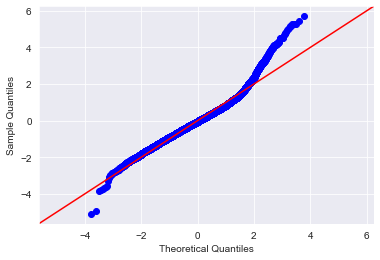

In [84]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


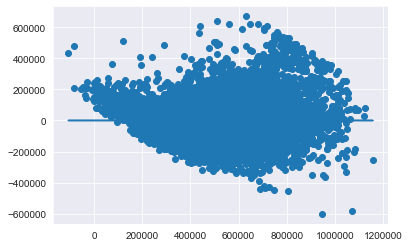

In [85]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

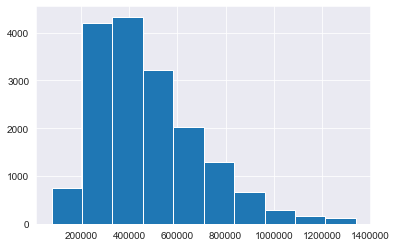

In [86]:
df.price.hist()

In [87]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 649000.0
0.81 percentile: 655775.0000000005
0.82 percentile: 669894.2
0.83 percentile: 680000.0
0.84 percentile: 695000.0
0.85 percentile: 705000.0
0.86 percentile: 720000.0
0.87 percentile: 735000.0
0.88 percentile: 750000.0
0.89 percentile: 765000.0
0.9 percentile: 780000.0
0.91 percentile: 800000.0
0.92 percentile: 820000.0
0.93 percentile: 844150.0000000014
0.94 percentile: 865000.0
0.95 percentile: 898597.0
0.96 percentile: 932951.9999999999
0.97 percentile: 980000.0
0.98 percentile: 1050000.0
0.99 percentile: 1190000.0


In [88]:
orig_tot = len(df)
df = df[df.price < 1100000] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
train, test = train_test_split(df)

Percent removed: 0.016651031894934335


In [89]:
X = train[x_cols]
y = train['price']

In [90]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.373e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:57   Log-Likelihood:                     -1.6351e+05
No. Observations:               12579   AIC:                                  3.270e+05
Df Residuals:                   12571   BIC:                                  3.271e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.366e+04   1241.004    -11.005      0.000   -1.61e+04   -1.12e+04
bathrooms             1.878e+04   1591.317     11.799      0.000    1.57e+04    2.19e+04
sqft_living           9.029e+04   1596.530     56.552      0.000    8.72e+04    9.34e+04
sqft_lot              1.073e+04   1048.686     10.232      0.000    8675.028    1.28e+04
distance_from_a_city -9.496e+04   1056.799    -89.859      0.000    -9.7e+04   -9.29e+04
Age_of_House          3.337e+04   1293.192     25.804      0.000    3.08e+04    3.59e+04
basement             -2.272e+04   2084.821    -10.898      0.000   -2.68e+04   -1.86e+04
grade                 6.428e+04    163.037    394.289      0.000     6.4e+04    6.46e+04
==============================================================================
Omnibus:                      557.862   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              987.204
Skew:                           0.359   Prob(JB):                    4.28e-215
Kurtosis:                       4.169   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

8 8
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.366e+04,1241.004,-11.005,0.0,-1.61e+04,-1.12e+04
bathrooms,1.878e+04,1591.317,11.799,0.0,1.57e+04,2.19e+04
sqft_living,9.029e+04,1596.530,56.552,0.0,8.72e+04,9.34e+04
sqft_lot,1.073e+04,1048.686,10.232,0.0,8675.028,1.28e+04
distance_from_a_city,-9.496e+04,1056.799,-89.859,0.0,-9.7e+04,-9.29e+04


In [92]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.373e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:59:58   Log-Likelihood:                     -1.6351e+05
No. Observations:               12579   AIC:                                  3.270e+05
Df Residuals:                   12571   BIC:                                  3.271e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.366e+04   1241.004    -11.005      0.000   -1.61e+04   -1.12e+04
bathrooms             1.878e+04   1591.317     11.799      0.000    1.57e+04    2.19e+04
sqft_living           9.029e+04   1596.530     56.552      0.000    8.72e+04    9.34e+04
sqft_lot              1.073e+04   1048.686     10.232      0.000    8675.028    1.28e+04
distance_from_a_city -9.496e+04   1056.799    -89.859      0.000    -9.7e+04   -9.29e+04
Age_of_House          3.337e+04   1293.192     25.804      0.000    3.08e+04    3.59e+04
basement             -2.272e+04   2084.821    -10.898      0.000   -2.68e+04   -1.86e+04
grade                 6.428e+04    163.037    394.289      0.000     6.4e+04    6.46e+04
==============================================================================
Omnibus:                      557.862   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              987.204
Skew:                           0.359   Prob(JB):                    4.28e-215
Kurtosis:                       4.169   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.66373100073868),
 ('bathrooms', 2.712055307823811),
 ('sqft_living', 2.6134140946827027),
 ('sqft_lot', 1.132628777143108),
 ('distance_from_a_city', 1.2088091060927226),
 ('Age_of_House', 1.811193357929755),
 ('basement', 1.755167878140606),
 ('grade', 1.655430701813613)]

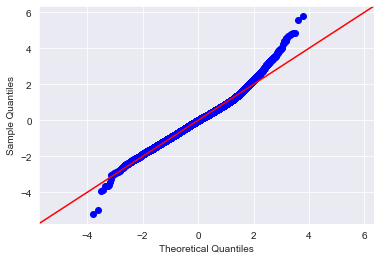

In [94]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


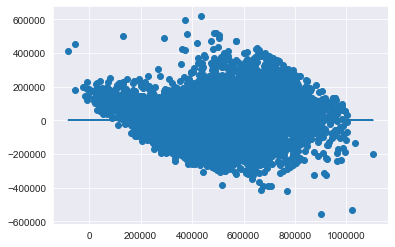

In [95]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

0.8 percentile: 632500.0
0.81 percentile: 643729.5000000001
0.82 percentile: 650583.5999999997
0.83 percentile: 665000.0
0.84 percentile: 675000.0
0.85 percentile: 689175.0000000002
0.86 percentile: 700000.0
0.87 percentile: 715000.0
0.88 percentile: 727000.0
0.89 percentile: 742000.0
0.9 percentile: 755000.0
0.91 percentile: 775000.0
0.92 percentile: 790000.0
0.93 percentile: 809950.0
0.94 percentile: 830000.0
0.95 percentile: 850000.0
0.96 percentile: 875145.44
0.97 percentile: 909993.5
0.98 percentile: 950000.0
0.99 percentile: 998000.0


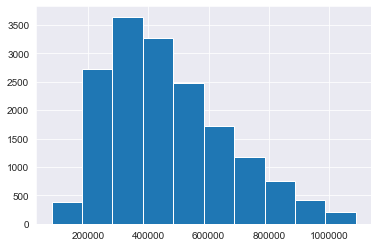

In [96]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [97]:
df = df[df.price <= 9250000]
train, test = train_test_split(df)

In [98]:
X = train[x_cols]
y= train['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          3.343e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:00:08   Log-Likelihood:                     -1.6356e+05
No. Observations:               12579   AIC:                                  3.271e+05
Df Residuals:                   12571   BIC:                                  3.272e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.188e+04   1239.210     -9.590      0.000   -1.43e+04   -9455.228
bathrooms             1.781e+04   1606.042     11.090      0.000    1.47e+04     2.1e+04
sqft_living           9.026e+04   1592.544     56.674      0.000    8.71e+04    9.34e+04
sqft_lot              1.241e+04   1030.896     12.038      0.000    1.04e+04    1.44e+04
distance_from_a_city -9.555e+04   1052.217    -90.808      0.000   -9.76e+04   -9.35e+04
Age_of_House          3.327e+04   1297.213     25.646      0.000    3.07e+04    3.58e+04
basement             -2.206e+04   2087.366    -10.567      0.000   -2.61e+04    -1.8e+04
grade                 6.426e+04    162.588    395.251      0.000    6.39e+04    6.46e+04
==============================================================================
Omnibus:                      497.814   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.167
Skew:                           0.344   Prob(JB):                    8.88e-181
Kurtosis:                       4.053   Cond. No.                         17.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

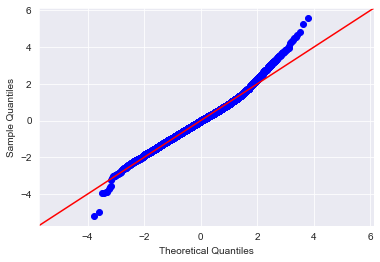

In [99]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)


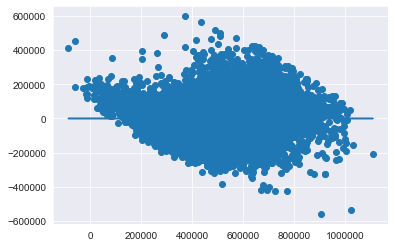

In [100]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [101]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [102]:
residuals = model.resid

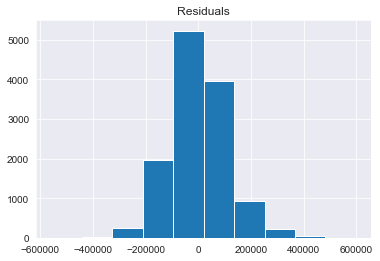

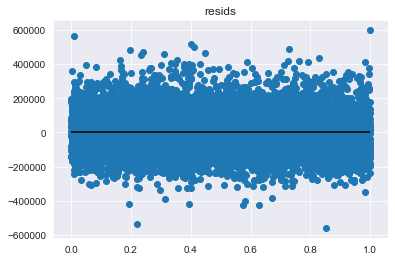

In [103]:
plot_residuals(residuals)

In [104]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [105]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [106]:
X_train = train[x_cols]
X_test = test[x_cols]

In [107]:
y_train = train['price']
y_test = test['price']

In [108]:
ols.fit(train[x_cols], train['price'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [109]:
ols.coef_

array([-11884.26783643,  17811.4576098 ,  90256.42715709,  12410.23548672,
       -95549.43394121,  33268.4137076 , -22056.36658827,  64263.20329417])

In [110]:
ols.intercept_

0.0

In [111]:
y_train_preds = ols.predict(train[x_cols])
y_train_preds

array([353858.73071571, 332484.52292067, 381220.63580834, ...,
       227169.09471859, 372202.88125929, 457163.59851682])

In [112]:
r2_score(train['price'], y_train_preds)

0.7068714530970472

In [113]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.7068714530970472

In [114]:
testing_score = ols.score(X_test, y_test)
testing_score

0.7081636966943974

In [115]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores

(0.7059841087595337, 0.7059210017777092, 0.7059210017777092)

In [ ]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv10_scores